<a href="https://colab.research.google.com/github/Yiecheverria/Modelo-ScrapyData/blob/main/Analisis_violaciones_global_ScrapyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

In [3]:
# Ubicacion del archivo de datos
url = 'Datos_violacion.csv' # external url?
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,0,País/territorio,2003,2004,2005,2006,2007,2008,2009,2010
0,0,0,Kenia,0,1440,1365,1291,876,735,847,0
1,1,0,Mauricio,53,40,38,64,77,69,57,51
2,2,0,Mozambique,0,102,64,46,41,47,44,0
3,3,0,Uganda,0,549,732,750,599,1536,619,709
4,4,0,Zimbabue,3858,4997,4790,4967,4762,3186,0,0


In [4]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1)
data

,0,País/territorio,2003,2004,2005,2006,2007,2008,2009,2010
0,0,Kenia,0,1440,1365,1291,876,735,847,0
1,0,Mauricio,53,40,38,64,77,69,57,51
2,0,Mozambique,0,102,64,46,41,47,44,0
3,0,Uganda,0,549,732,750,599,1536,619,709
4,0,Zimbabue,3858,4997,4790,4967,4762,3186,0,0
...,...,...,...,...,...,...,...,...,...,...
117,0,Suiza,547,573,646,639,648,612,666,543
118,0,Australia,0,0,0,0,0,6382,6343,6378
119,0,Nueva Zelanda,0,0,994,1183,1143,1130,1128,1129
120,0,Sudáfrica,0,69117,68076,65201,63818,70514,68332,66196


In [5]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   0                122 non-null    int64 
 1   País/territorio  122 non-null    object
 2   2003             122 non-null    int64 
 3   2004             122 non-null    int64 
 4   2005             122 non-null    int64 
 5   2006             122 non-null    int64 
 6   2007             122 non-null    int64 
 7   2008             122 non-null    int64 
 8   2009             122 non-null    int64 
 9   2010             122 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 9.7+ KB


In [ ]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,0,2003,2004,2005,2006,2007,2008,2009,2010
count,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.0,1468.000000,2267.918033,2366.377049,2369.049180,2260.336066,2340.467213,2242.811475,1934.885246
std,0.0,8606.197636,10695.503591,10570.052460,10438.374979,10267.369890,10453.375943,10245.891841,9794.955721
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,38.250000,28.250000,0.000000,0.000000,0.000000,0.000000
50%,0.0,34.000000,112.000000,257.500000,196.500000,135.000000,157.000000,96.500000,0.000000
75%,0.0,544.000000,687.000000,1094.000000,1139.250000,900.500000,1057.250000,773.750000,527.000000
max,0.0,93883.000000,95089.000000,94347.000000,94472.000000,92999.000000,90750.000000,89241.000000,84767.000000


In [6]:
data[['2003','2004', '2005', '2006', '2007', '2008', '2009', '2010']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


<ipython-input-6-55469168a6a2>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['2003','2004', '2005', '2006', '2007', '2008', '2009', '2010']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,2003,2004,2005,2006,2007,2008,2009,2010
2003,1.00,0.80,0.80,0.81,0.81,0.78,0.78,0.76
2004,0.80,1.00,1.00,1.00,0.99,0.99,0.99,0.99
2005,0.80,1.00,1.00,1.00,1.00,1.00,0.99,0.99
2006,0.81,1.00,1.00,1.00,1.00,0.99,0.99,0.99
2007,0.81,0.99,1.00,1.00,1.00,1.00,0.99,0.99
2008,0.78,0.99,1.00,0.99,1.00,1.00,1.00,0.99
2009,0.78,0.99,0.99,0.99,0.99,1.00,1.00,0.99
2010,0.76,0.99,0.99,0.99,0.99,0.99,0.99,1.00


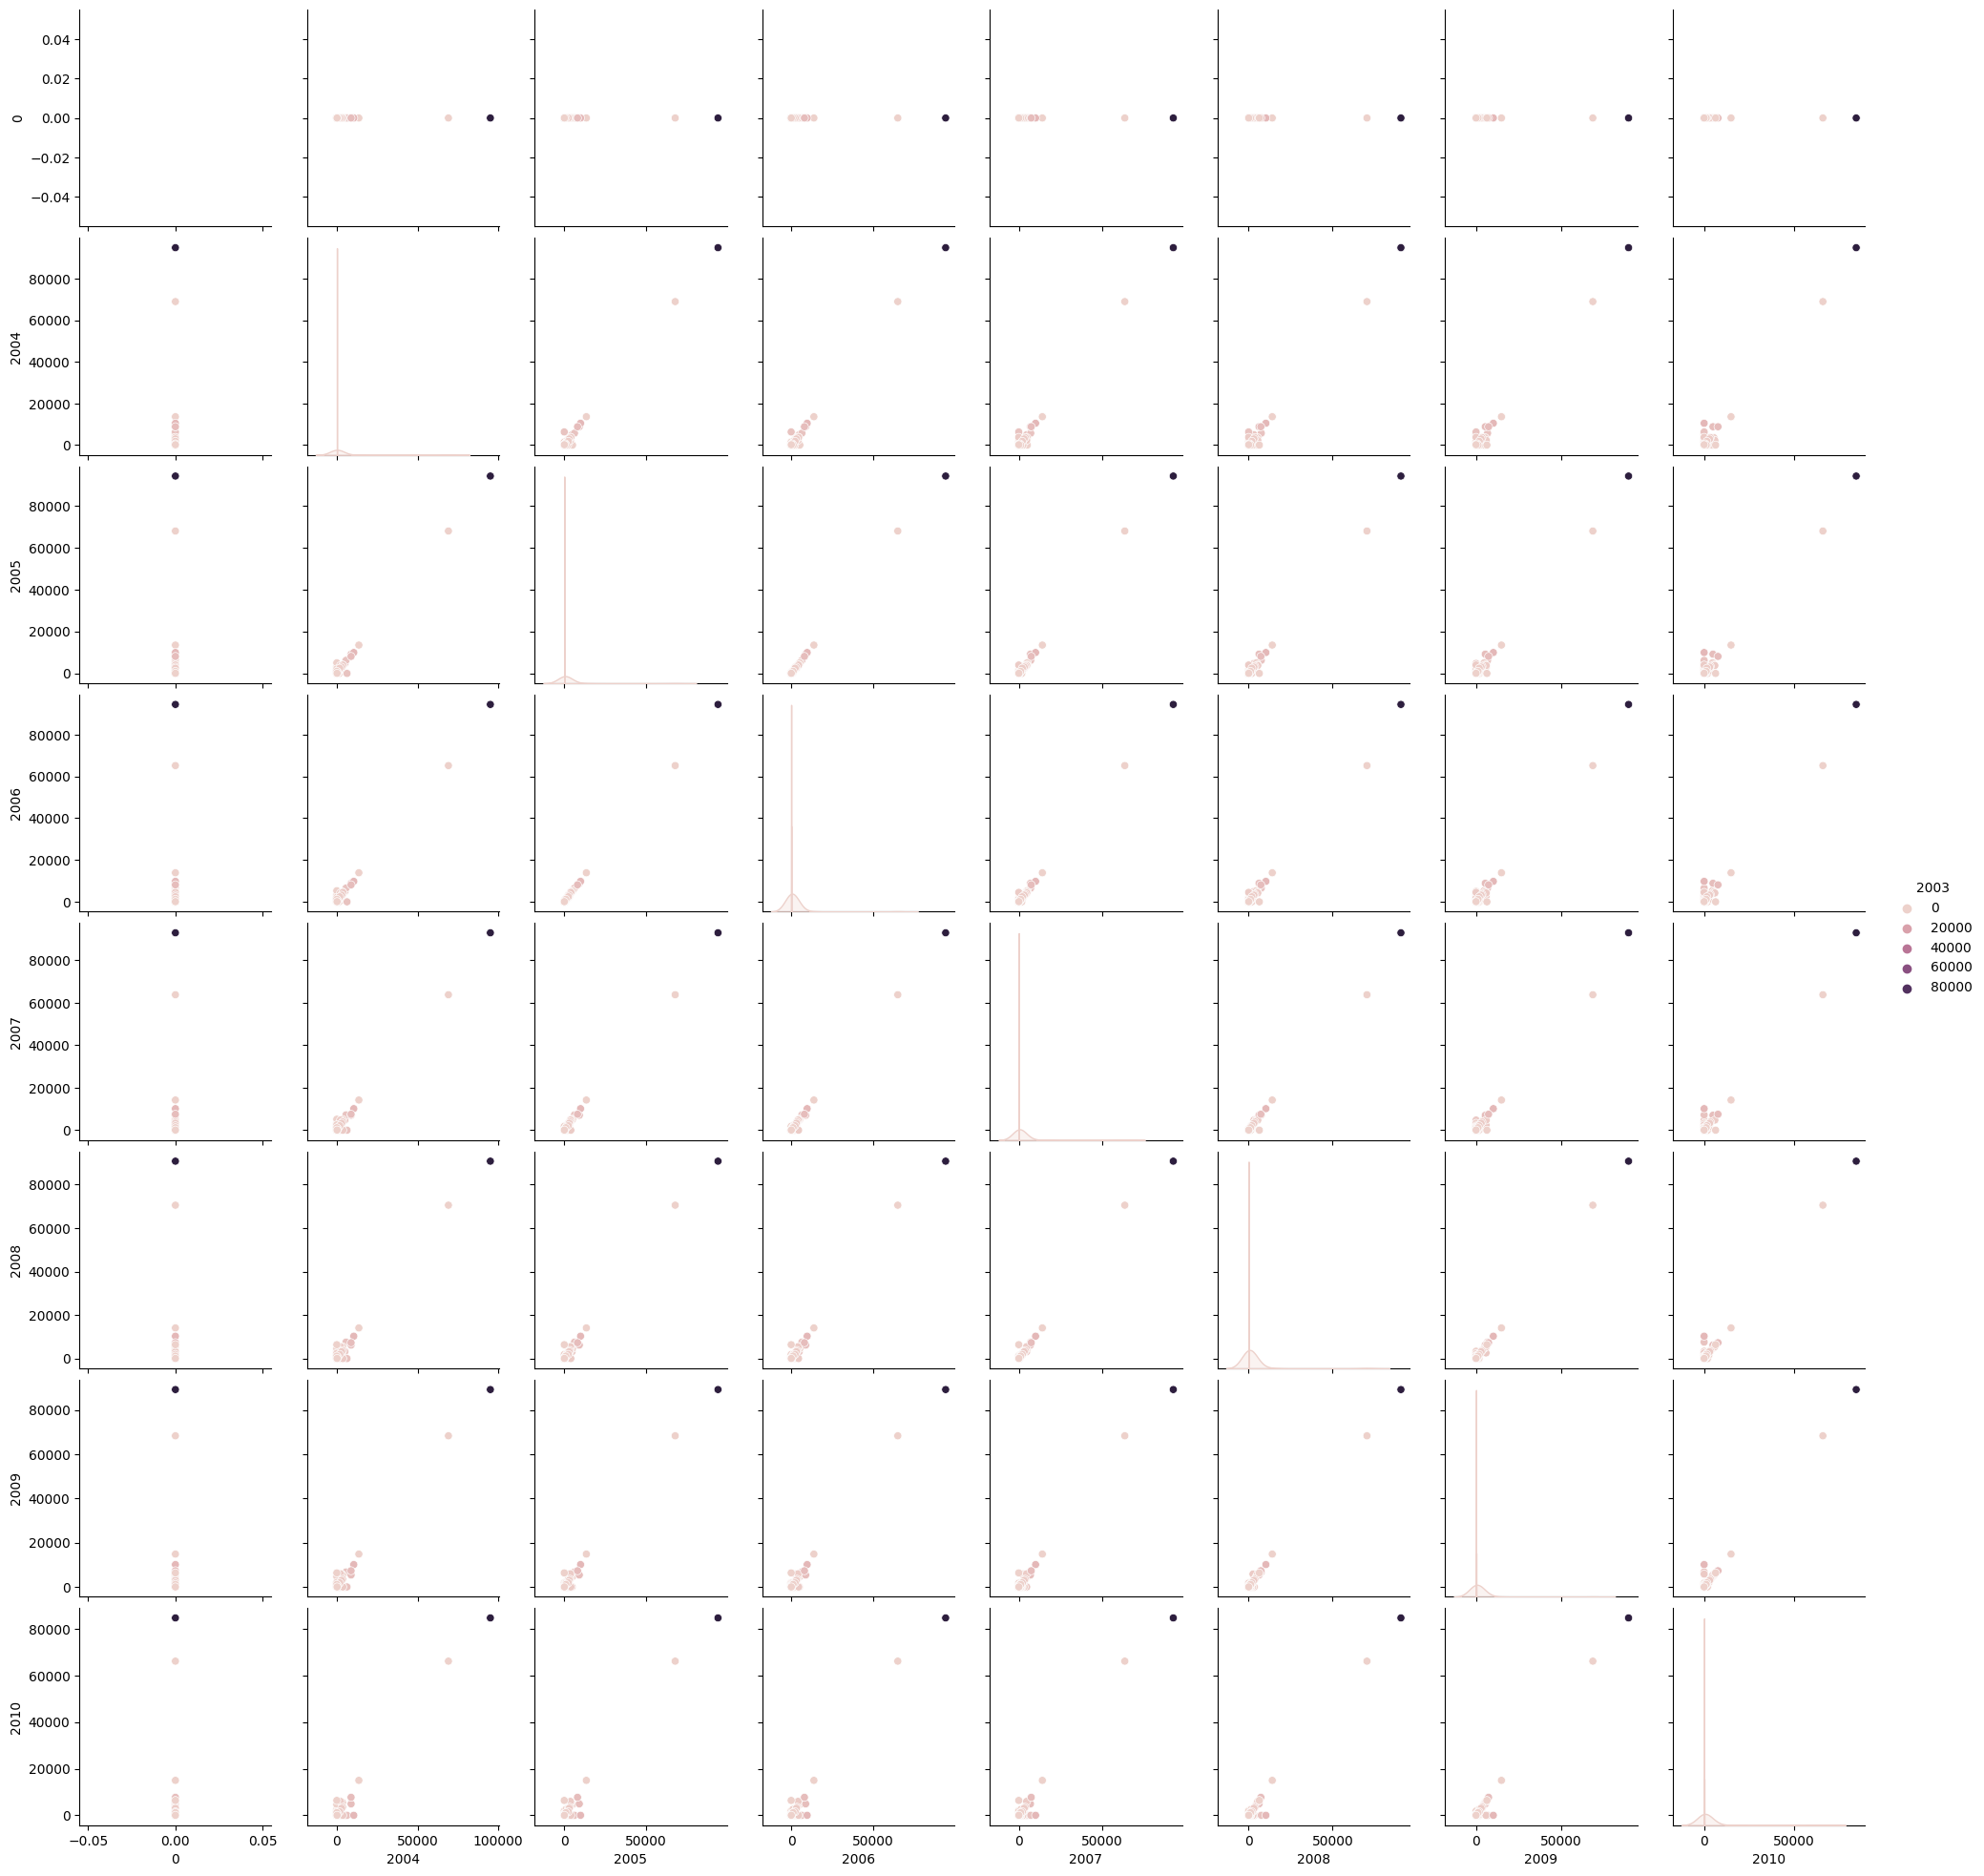

In [7]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="2003")

In [13]:
# Seleccción de variables significativas
sel_data = data[['2003','2004', '2005', '2006', '2007', '2008', '2009', '2010']]
sel_data

,2003,2004,2005,2006,2007,2008,2009,2010
0,0,1440,1365,1291,876,735,847,0
1,53,40,38,64,77,69,57,51
2,0,102,64,46,41,47,44,0
3,0,549,732,750,599,1536,619,709
4,3858,4997,4790,4967,4762,3186,0,0
...,...,...,...,...,...,...,...,...
117,547,573,646,639,648,612,666,543
118,0,0,0,0,0,6382,6343,6378
119,0,0,994,1183,1143,1130,1128,1129
120,0,69117,68076,65201,63818,70514,68332,66196


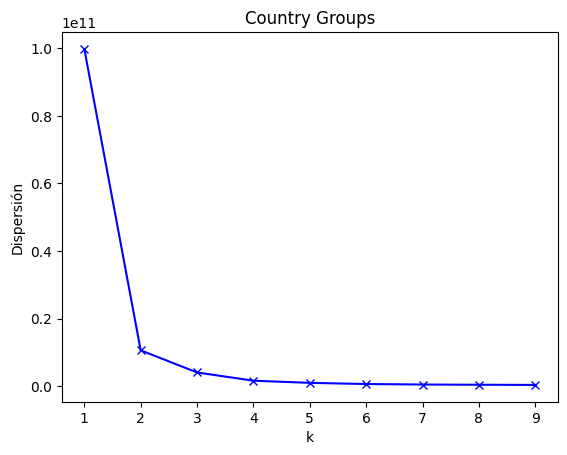

In [14]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Country Groups')